In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
data_dir="/kaggle/input/flower"

In [7]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/kaggle/input/flower')

In [8]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [12]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [44]:
roses = list(data_dir.glob('roses/*'))


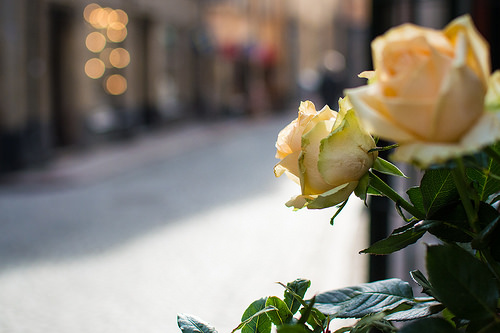

In [48]:
PIL.Image.open(str(roses[5]))


In [50]:
img = cv2.imread(str(flowers_images_dict['roses'][5]))
img

array([[[ 61,  63,  64],
        [ 62,  64,  65],
        [ 65,  64,  66],
        ...,
        [  6,   7,   5],
        [  6,   7,   5],
        [  7,   7,   7]],

       [[ 62,  64,  65],
        [ 62,  64,  65],
        [ 65,  64,  66],
        ...,
        [  8,   6,   5],
        [  6,   7,   5],
        [  7,   7,   7]],

       [[ 62,  64,  65],
        [ 62,  64,  65],
        [ 65,  64,  66],
        ...,
        [  9,   7,   6],
        [  9,   7,   6],
        [  9,   7,   7]],

       ...,

       [[206, 211, 209],
        [204, 209, 207],
        [202, 207, 205],
        ...,
        [  3,  15,   9],
        [  2,  14,   8],
        [  2,  14,   8]],

       [[204, 209, 207],
        [203, 208, 206],
        [201, 206, 205],
        ...,
        [  6,  16,  10],
        [  5,  15,   9],
        [  3,  13,   7]],

       [[202, 207, 206],
        [201, 206, 205],
        [199, 204, 203],
        ...,
        [  6,  16,  10],
        [  5,  15,   9],
        [  3,  13,   7]]

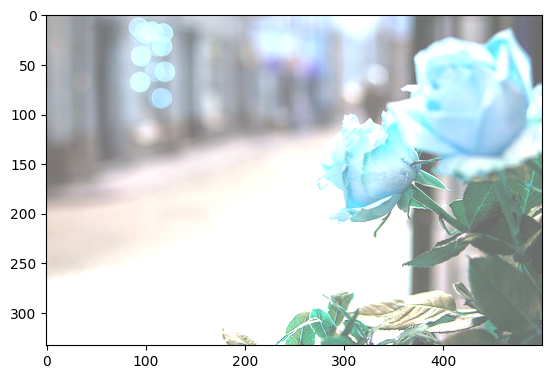

In [61]:
seed = (1, 2)
img=tf.image.stateless_random_brightness(img, 0.2, seed)
plt.imshow(img)
 


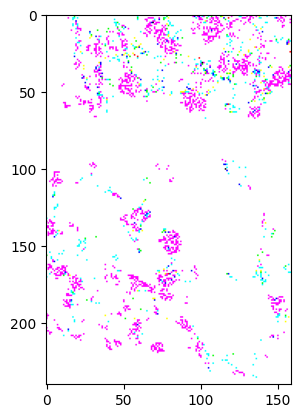

In [89]:
img = cv2.imread(str(flowers_images_dict['roses'][9]))
img=img_to_array(img)


seed = (0,1)
img=tf.image.stateless_random_flip_up_down(img,seed)



plt.imshow(img)

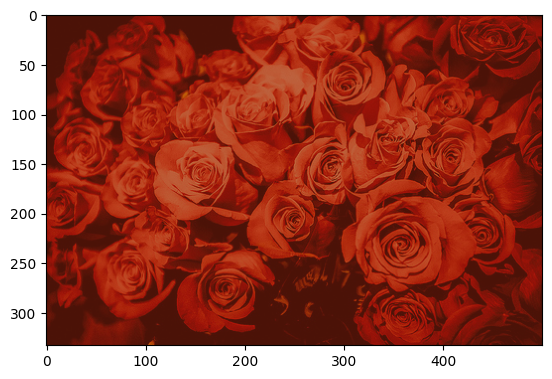

In [77]:
seed = (1, 2)
img=tf.image.stateless_random_contrast(img, 0.2, 0.5, seed)
plt.imshow(img)

In [13]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [15]:
X = np.array(X)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 50s 573ms/step - loss: 1.3765 - accuracy: 0.4048
Epoch 2/10
86/86 [==============================] - 48s 562ms/step - loss: 0.9892 - accuracy: 0.6079
Epoch 3/10
86/86 [==============================] - 49s 575ms/step - loss: 0.8034 - accuracy: 0.6926
Epoch 4/10
86/86 [==============================] - 49s 572ms/step - loss: 0.6015 - accuracy: 0.7754
Epoch 5/10
86/86 [==============================] - 50s 577ms/step - loss: 0.3709 - accuracy: 0.8710
Epoch 6/10
86/86 [==============================] - 49s 570ms/step - loss: 0.2118 - accuracy: 0.9368
Epoch 7/10
86/86 [==============================] - 50s 579ms/step - loss: 0.1086 - accuracy: 0.9662
Epoch 8/10
86/86 [==============================] - 50s 577ms/step - loss: 0.0748 - accuracy: 0.9804
Epoch 9/10
86/86 [==============================] - 49s 574ms/step - loss: 0.0677 - accuracy: 0.9822
Epoch 10/10
86/86 [==============================] - 50s 582ms/step - loss: 0.0424 - accura

In [20]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 5s 160ms/step - loss: 2.3915 - accuracy: 0.5752


[2.3915326595306396, 0.5751634240150452]

In [21]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 5s 175ms/step


array([[  3.1790073 ,   2.6631675 , -10.39118   , -10.036517  ,
         -1.333702  ],
       [  3.5695443 ,  -1.2292259 , -15.301511  , -12.740547  ,
          9.768049  ],
       [ -0.18530709,   0.7801811 ,   1.954401  ,  -4.471724  ,
          0.62555987],
       ...,
       [  1.4133805 ,  -5.237875  ,   4.197993  ,   2.689674  ,
         -6.397321  ],
       [ -3.2677853 ,   7.3870273 ,  -2.0784576 ,  -9.303275  ,
          1.6185013 ],
       [ -4.645179  ,  -9.461763  ,   3.0380397 ,   8.16142   ,
         -3.1737597 ]], dtype=float32)

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

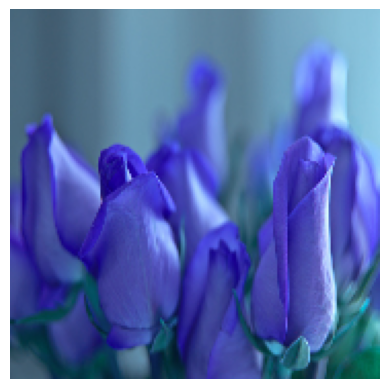

In [23]:
plt.axis('off')
plt.imshow(X[0])

Number of images in dandelion = 898

Number of images in sunflowers = 699

Number of images in daisy = 633

Number of images in roses = 641

Number of images in tulips = 799



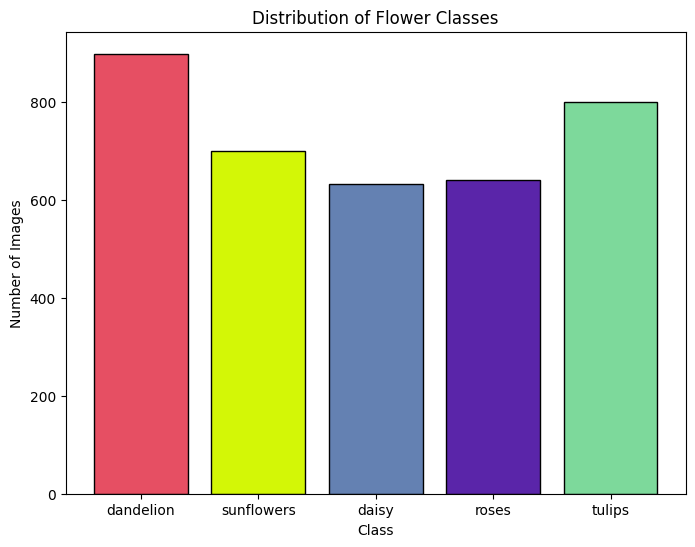

In [24]:
No_images_per_class = []
Class_name = []

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        No_images_per_class.append(num_images)
        Class_name.append(class_name)
        print('Number of images in {} = {}\n'.format(class_name, num_images))

colors = [np.random.rand(3,) for _ in range(len(Class_name))]

plt.figure(figsize=(8, 6))
plt.bar(Class_name, No_images_per_class, color=colors, edgecolor='black')

plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Flower Classes')

plt.show()


In [1]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

NameError: name 'plt' is not defined

In [26]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 60s 679ms/step - loss: 1.3083 - accuracy: 0.4266
Epoch 2/10
86/86 [==============================] - 58s 671ms/step - loss: 1.0530 - accuracy: 0.5828
Epoch 3/10
86/86 [==============================] - 58s 672ms/step - loss: 0.9700 - accuracy: 0.6108
Epoch 4/10
86/86 [==============================] - 57s 663ms/step - loss: 0.8973 - accuracy: 0.6457
Epoch 5/10
86/86 [==============================] - 57s 666ms/step - loss: 0.8410 - accuracy: 0.6719
Epoch 6/10
86/86 [==============================] - 57s 662ms/step - loss: 0.8100 - accuracy: 0.6879
Epoch 7/10
86/86 [==============================] - 57s 666ms/step - loss: 0.7647 - accuracy: 0.7042
Epoch 8/10
86/86 [==============================] - 57s 664ms/step - loss: 0.7351 - accuracy: 0.7217
Epoch 9/10
86/86 [==============================] - 57s 668ms/step - loss: 0.6999 - accuracy: 0.7257
Epoch 10/10
86/86 [==============================] - 61s 710ms/step - loss: 0.6651 - accura

In [27]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 5s 163ms/step - loss: 0.7727 - accuracy: 0.7015


[0.7726624608039856, 0.7015250325202942]

In [28]:
print('test data', X_test_scaled)
preds = np.round(model.predict(X_test_scaled),0) 

print('rounded test_labels', preds)

test data [[[[0.94509804 0.96470588 0.97254902]
   [0.96078431 0.97254902 0.98431373]
   [0.94509804 0.95686275 0.97647059]
   ...
   [0.83921569 0.85490196 0.8745098 ]
   [0.64313725 0.70980392 0.70588235]
   [0.44705882 0.55686275 0.56862745]]

  [[0.90588235 0.92941176 0.94509804]
   [0.94901961 0.96470588 0.98039216]
   [0.96078431 0.97254902 0.98823529]
   ...
   [0.89019608 0.90588235 0.9254902 ]
   [0.7254902  0.78431373 0.78039216]
   [0.51764706 0.61176471 0.62745098]]

  [[0.87843137 0.90196078 0.9254902 ]
   [0.92941176 0.94509804 0.96862745]
   [0.95686275 0.96470588 0.98431373]
   ...
   [0.90196078 0.9254902  0.94117647]
   [0.75294118 0.81176471 0.80784314]
   [0.5372549  0.62745098 0.64705882]]

  ...

  [[0.24705882 0.54117647 0.45490196]
   [0.28627451 0.58823529 0.50196078]
   [0.27843137 0.58823529 0.50588235]
   ...
   [0.52941176 0.62745098 0.67058824]
   [0.50196078 0.60392157 0.65490196]
   [0.49411765 0.59215686 0.65882353]]

  [[0.28235294 0.60784314 0.5294117

In [32]:
from sklearn.metrics import classification_report
flowers = ['roses','daisy','dandelion','sunflower','tulips']

pred_labels = np.argmax(preds, axis=1)

y_true = y_test

# Generate the classification report
classification_metrics = classification_report(y_true, pred_labels, target_names=flowers)
print(classification_metrics)


              precision    recall  f1-score   support

       roses       0.61      0.52      0.56       176
       daisy       0.65      0.76      0.70       154
   dandelion       0.74      0.78      0.76       226
   sunflower       0.73      0.85      0.78       150
      tulips       0.76      0.62      0.68       212

    accuracy                           0.70       918
   macro avg       0.70      0.71      0.70       918
weighted avg       0.70      0.70      0.70       918



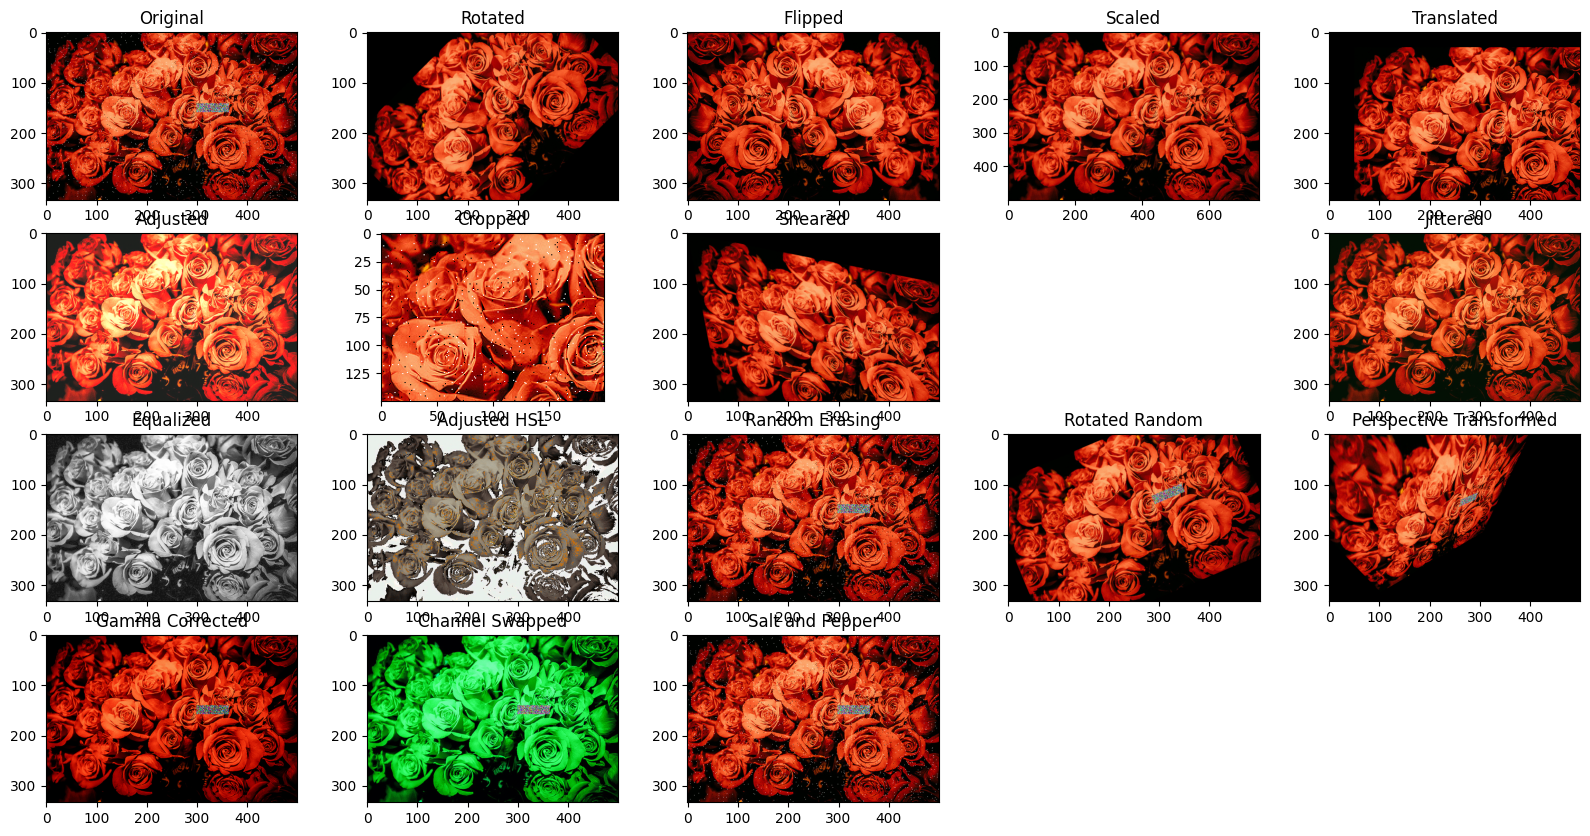

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the paths
input_image_path = '/kaggle/input/flower/roses/10503217854_e66a804309.jpg'

# Read the input image
img = cv2.imread(input_image_path)

# Data augmentation operations

# 1. Rotation
angle = 45
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), angle, 1)
rotated_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 2. Flip
flipped_img = cv2.flip(img, 1)

# 3. Scaling
scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# 4. Translation
M = np.float32([[1, 0, 50], [0, 1, 30]])  # 50 pixels right, 30 pixels down
translated_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 5. Brightness and Contrast Adjustment
alpha = 1.5  # contrast control (1.0 means no change)
beta = 30    # brightness control (0 means no change)
adjusted_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# 6. Crop
x, y, w, h = 100, 50, 200, 150  # Define the ROI coordinates
cropped_img = img[y:y+h, x:x+w]

# 7. Shear
shear_matrix = np.float32([[1, 0.2, 0], [0.2, 1, 0]])
sheared_img = cv2.warpAffine(img, shear_matrix, (img.shape[1], img.shape[0]))



# 9. Color Jittering
jitter = np.random.randint(-20, 20, size=(1, 1, 3))
jittered_img = np.clip(img + jitter, 0, 255).astype(np.uint8)

# 10. Histogram Equalization
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_img)

# 11. HSL Adjustment
hsl_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
h, l, s = cv2.split(hsl_img)
h += 10  # Adjust hue
s = np.clip((s * 1.2).astype(np.uint8), 0, 255)  # Adjust saturation and convert to uint8
l -= 20  # Adjust lightness
adjusted_hsl_img = cv2.merge((h, l, s))
adjusted_img_hsl = cv2.cvtColor(adjusted_hsl_img, cv2.COLOR_HLS2BGR)


# 12. Random Erasing
p = 0.5  # Probability of applying random erasing
if np.random.rand() < p:
    x, y, h, w = np.random.randint(0, img.shape[1]), np.random.randint(0, img.shape[0]), np.random.randint(10, 100), np.random.randint(10, 100)
    img[y:y+h, x:x+w] = np.random.randint(0, 256, size=(h, w, 3))

# 13. Rotation with Crop (Randomized)
angle = np.random.uniform(-30, 30)
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), angle, 1)
rotated_img_random = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 14. Perspective Transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250], [200, 200]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_transformed_img = cv2.warpPerspective(img, perspective_matrix, (img.shape[1], img.shape[0]))

# 15. Gamma Correction
gamma = 1.5
gamma_corrected_img = np.power(img / 255.0, gamma) * 255.0
gamma_corrected_img = gamma_corrected_img.astype(np.uint8)

# 16. Channel Swap
channel_order = np.random.permutation(3)
channel_swapped_img = img[:, :, channel_order]

# 17. Salt and Pepper Noise
noise_ratio = 0.02
salt_pepper_mask = np.random.rand(img.shape[0], img.shape[1]) < noise_ratio
salt_mask = salt_pepper_mask & (np.random.rand(img.shape[0], img.shape[1]) < 0.5)
pepper_mask = salt_pepper_mask & ~salt_mask
img[salt_mask] = 255
img[pepper_mask] = 0

# Display the augmented images
plt.figure(figsize=(20, 10))

plt.subplot(4, 5, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(4, 5, 2), plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)), plt.title('Rotated')
plt.subplot(4, 5, 3), plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB)), plt.title('Flipped')
plt.subplot(4, 5, 4), plt.imshow(cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)), plt.title('Scaled')
plt.subplot(4, 5, 5), plt.imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB)), plt.title('Translated')
plt.subplot(4, 5, 6), plt.imshow(cv2.cvtColor(adjusted_img, cv2.COLOR_BGR2RGB)), plt.title('Adjusted')
plt.subplot(4, 5, 7), plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)), plt.title('Cropped')
plt.subplot(4, 5, 8), plt.imshow(cv2.cvtColor(sheared_img, cv2.COLOR_BGR2RGB)), plt.title('Sheared')
plt.subplot(4, 5, 10), plt.imshow(cv2.cvtColor(jittered_img, cv2.COLOR_BGR2RGB)), plt.title('Jittered')
plt.subplot(4, 5, 11), plt.imshow(equalized_img, cmap='gray'), plt.title('Equalized')
plt.subplot(4, 5, 12), plt.imshow(cv2.cvtColor(adjusted_img_hsl, cv2.COLOR_BGR2RGB)), plt.title('Adjusted HSL')
plt.subplot(4, 5, 13), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Random Erasing')
plt.subplot(4, 5, 14), plt.imshow(cv2.cvtColor(rotated_img_random, cv2.COLOR_BGR2RGB)), plt.title('Rotated Random')
plt.subplot(4, 5, 15), plt.imshow(cv2.cvtColor(perspective_transformed_img, cv2.COLOR_BGR2RGB)), plt.title('Perspective Transformed')
plt.subplot(4, 5, 16), plt.imshow(cv2.cvtColor(gamma_corrected_img, cv2.COLOR_BGR2RGB)), plt.title('Gamma Corrected')
plt.subplot(4, 5, 17), plt.imshow(cv2.cvtColor(channel_swapped_img, cv2.COLOR_BGR2RGB)), plt.title('Channel Swapped')
plt.subplot(4, 5, 18), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Salt and Pepper')

plt.show()
